# 1. LeNet : 최초의 CNN
<img src='image/LeNet.png' alt='Lent'>

FC(120) : 120개 출력층의 뉴련을 가진 Fully Connected 레이어

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.metrics import confusion_matrix
import pandas as pd # crosstab
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class CustomHistory(Callback):
    def __init__(self, times = 5):
        self.epoch = 0
        self.times = times
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%self.times == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss{}, val_acc:{}'.format(self.epoch, 
                                                                             logs.get('loss'),
                                                                             logs.get('accuracy'),
                                                                             logs.get('val_loss'),
                                                                             logs.get('val_accuracy')))

In [5]:
# 출력사이즈 = (입력사이즈 - 커널사이즈)/스트라이드 + 1
class LeNet:
    @staticmethod
    def build(input_shape=(32,32,1), activation='relu'):
        model = Sequential()
        model.add(Input(shape=input_shape))
        model.add(Conv2D(6, kernel_size=(5,5), activation=activation, kernel_initializer='he_normal', padding='valid')) # C1층
        model.add(AveragePooling2D(strides=2)) # pool_size 기본값 2 x 2, 스트라이드 기본값 pool_size # P2층
        model.add(Conv2D(6, kernel_size=(5,5), activation=activation, kernel_initializer='he_normal')) # C3층
        model.add(AveragePooling2D(strides=2)) # P4층
        model.add(Flatten())
        model.add(Dense(units=120, activation='relu', kernel_initializer='he_normal')) # F5층
        model.add(Dense(units=84, activation='relu', kernel_initializer='he_normal')) # F6층
        model.add(Dense(units=10, activation='softmax')) # 출력층
        return model

In [11]:
class LeNet:
    @staticmethod
    def build(input_shape=(32,32,1), activation='relu'):
        model = Sequential([
            Input(shape=input_shape),
            Conv2D(6, kernel_size=(5,5), activation=activation, kernel_initializer='he_normal', padding='valid'),
            AveragePooling2D(pool_size=(2,2), strides=2),
            Conv2D(16, kernel_size=(5,5), activation=activation, kernel_initializer='he_normal'),
            AveragePooling2D(pool_size=(2,2), strides=2),
            Flatten(),
            Dense(units=120, activation='relu', kernel_initializer='he_normal'),
            Dense(units=84, activation='relu', kernel_initializer='he_normal'),
            Dense(units=10, activation='softmax')
        ])
        return model

In [12]:
model = LeNet.build(input_shape=(28,28,1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [15]:
# 1. 데이터
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = X_train.reshape(-1,28,28,1)/255.0
X_test = X_test.reshape(-1,28,28,1)/255.0
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [16]:
# 2. 모델생성
model = LeNet.build(input_shape=(28,28,1))

# 3. 학습설정
model.compile(loss='sparse_categorical_crossentropy', # 원핫인코딩을 안 하고 분류분석
              optimizer='adam', metrics=['accuracy'])

# 4. 학습
customhistory = CustomHistory(3)
earlystopping = EarlyStopping(patience=10)
hist = model.fit(X_train, y_train,
                  epochs=50,
                  verbose=0,
                  validation_split=.2,
                  callbacks=[earlystopping, customhistory])

epoch:3, loss:0.05377725139260292, acc:0.9829791784286499, val_loss0.054274264723062515, val_acc:0.98416668176651
epoch:6, loss:0.02888118289411068, acc:0.9909166693687439, val_loss0.046196725219488144, val_acc:0.9871666431427002
epoch:9, loss:0.018458977341651917, acc:0.9940416812896729, val_loss0.03495071828365326, val_acc:0.9900833368301392
epoch:12, loss:0.013000803999602795, acc:0.995395839214325, val_loss0.04630152881145477, val_acc:0.9891666769981384
epoch:15, loss:0.008112713694572449, acc:0.9972291588783264, val_loss0.04784132540225983, val_acc:0.9896666407585144
epoch:18, loss:0.008348552510142326, acc:0.9971874952316284, val_loss0.05094550549983978, val_acc:0.9881666898727417


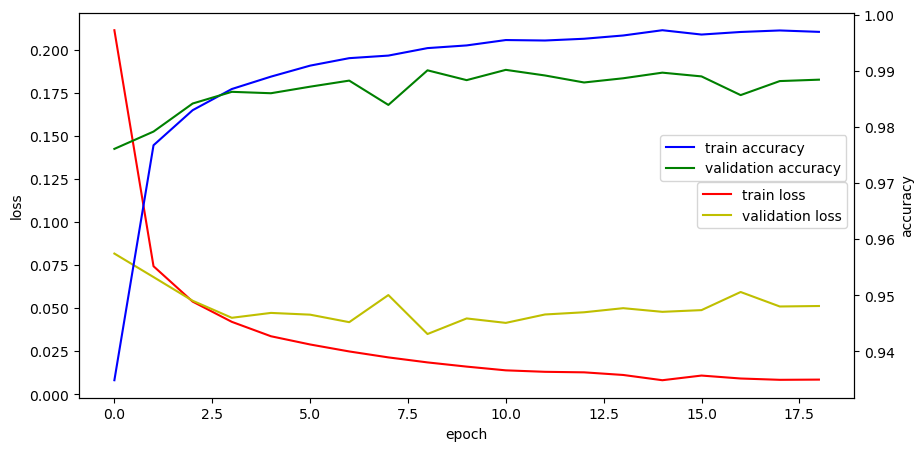

In [21]:
# 5. 학습 평가
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print('정확도 : {:.2f}'.format(accuracy*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.9905
정확도 : 99.05


In [23]:
# 예측치와 실제값을 이용한 교차표
y_hat = np.argmax(model.predict(X_test), axis=1)
y_hat

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
ctab = pd.crosstab(y_test, y_hat)
ctab.columns.name = '예측값'
ctab.index.name = '실제값'
display(ctab)
cnt = 0
for y, h in zip(y_test, y_hat):
    if y != h:
        cnt += 1
print(cnt)

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,975,1,0,0,0,0,1,2,0,1
1,0,1133,0,0,0,0,1,0,1,0
2,0,1,1024,0,0,0,0,5,2,0
3,0,1,2,995,0,7,0,1,2,2
4,0,1,1,0,974,0,0,0,2,4
5,1,1,0,6,0,879,1,1,0,3
6,1,3,1,0,1,1,951,0,0,0
7,0,5,2,0,0,1,0,1019,0,1
8,1,0,4,0,2,0,1,0,962,4


95


i = 10000
cnt = 95


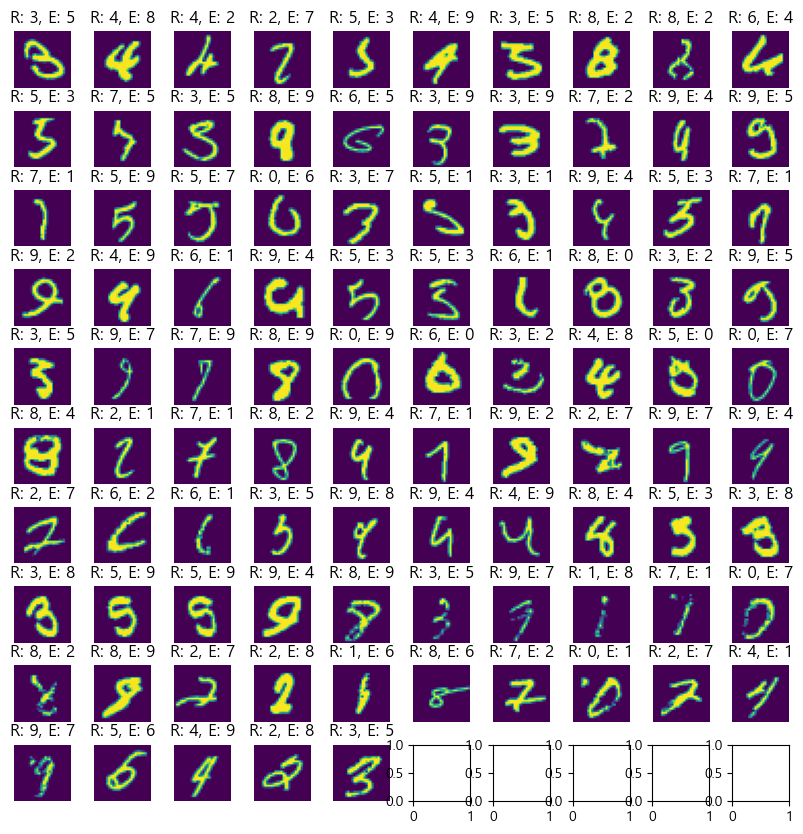

In [35]:
plt_row=10
plt_col=10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font',family='Malgun Gothic') # 윈도우즈 os

fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)

plt.subplots_adjust(hspace=.4, wspace=.4)

i = 0 # y_hat과 y_test를 액세스할 index
cnt = 0 # 출력할 횟수

while(cnt < plt_row * plt_col) & (i < len(y_test)):
    # 예측 실패한 경우만 imshow(X_test[i]), 
    # 실제값(y_test)과 예측치(yhat)를 title에 출력
    if y_hat[i] == y_test[i]:
        i += 1
        continue
    # 예측 실패한 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(28, 28))
    title = 'R: {}, E: {}'.format(y_test[i], y_hat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =', cnt)

# 2. AlexNet
- GPU를 사용하여 실현 가능한 모델. 알렉스와 제프리힌튼이 공동 설계한 CNN 아키텍처 이름

<img src='image/AlexNet.png' alt='AlexNet'>

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization # 배치정규화
from tensorflow.keras.callbacks import EarlyStopping, Callback
import pandas as pd # crosstab
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CustomHistory(Callback):
    def __init__(self, times = 5):
        self.epoch = 0
        self.times = times
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%self.times == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss{}, val_acc:{}'.format(self.epoch, 
                                                                             logs.get('loss'),
                                                                             logs.get('accuracy'),
                                                                             logs.get('val_loss'),
                                                                             logs.get('val_accuracy')))

In [3]:
class AlexNet:
    @staticmethod
    def build(input_shape = (224,224,3), activation = 'relu', class_num = 1000):
        model = Sequential([
            Input(shape=input_shape),
            Conv2D(96, kernel_size=(11,11), strides=(4,4), activation=activation, padding='same'),
            MaxPooling2D(pool_size=(3,3), strides=2),
            BatchNormalization(), # 배치 정규화
            Conv2D(256, kernel_size=(5,5), padding='same', activation=activation),
            MaxPooling2D(pool_size=(3,3), strides=2),
            BatchNormalization(),
            Conv2D(384, kernel_size=(3,3), padding='same', activation=activation),
            Conv2D(384, kernel_size=(3,3), padding='same', activation=activation),
            Conv2D(256, kernel_size=(3,3), padding='same', activation=activation),
            # AlexNet은 224*224 이미지에 맞춰서 3*3 pooling이 되나, cifar 32*32 이미지에서는 생략
#             MaxPool2D(pool_size=(3,3), strides=2),
            Flatten(),
            Dense(units=4096, activation=activation),
            Dropout(.5),
            Dense(units=4096, activation=activation),
            Dropout(.5),
            Dense(units=class_num, activation='softmax')
        ])
        return model

In [4]:
# 1. 데이터 (원핫인코딩X)
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


[6]


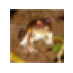

In [5]:
plt.figure(figsize=(0.7,0.7))
plt.imshow(X_train[0])
plt.axis('off')
print(y_train[0])

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [8]:
# 2. 모델 생성
# model = AlexNet.build(input_shape=(32,32,3), class_num=10) 학습시간 단축을 위한 아래모델 사용
model = Sequential([
            Input(shape=(32,32,3)),
            Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', padding='same'), # 파리미터수 : (11*11*96*3) + 96
            MaxPooling2D(pool_size=(3,3), strides=2),
            BatchNormalization(), # 배치 정규화
            Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'), # 파리미터수 : (96*3*3*384) + 384
            Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),# 파리미터수 : (384*3*3*256) + 256
            Flatten(),
            Dense(units=1024, activation='relu'),
            Dropout(.5),
            Dense(units=512, activation='relu'),
            Dropout(.5),
            Dense(units=10, activation='softmax')
        ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 96)         0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 3, 3, 96)         384       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 384)         332160    
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 256)         884992    
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [9]:
# 3. 모델 학습 설정
model.compile(loss='sparse_categorical_crossentropy', # 원핫인코딩을 안 하고 분류분석
              optimizer='adam', metrics=['accuracy'])

In [12]:
# 4. 모델 학습
hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3599 - accuracy: 0.8848 - val_loss: 1.5821 - val_accuracy: 0.6034
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3347 - accuracy: 0.8941 - val_loss: 1.8068 - val_accuracy: 0.6120
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3156 - accuracy: 0.8999 - val_loss: 1.7806 - val_accuracy: 0.6068
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3094 - accuracy: 0.9029 - val_loss: 1.8095 - val_accuracy: 0.6055
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2881 - accuracy: 0.9092 - val_loss: 1.9804 - val_accuracy: 0.6087
Epoch 6/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2691 - accuracy: 0.9160 - val_loss: 2.0826 - val_accuracy: 0.6001
Epoch 7/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2616 - accuracy: 0.9181 - val_loss: 2.0575 - val_ac

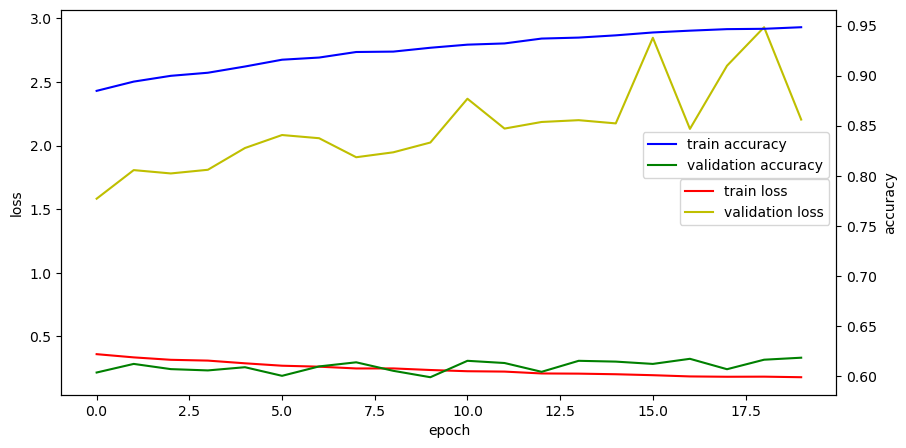

In [37]:
# 5. 모델 평가 - 학습과정 살펴보기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [38]:
# 5. 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print('정확도 : {:.2f}'.format(accuracy*100))
print('loss : {}'.format(loss))

313/313 [==============================] - 1s 4ms/step - loss: 2.2042 - accuracy: 0.6182
정확도 : 61.82
loss : 2.204169511795044


In [36]:
"""
airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9
"""
y_hat = np.argmax(model.predict(X_test), axis=1)
cifal10_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
ctab = pd.crosstab(y_test.reshape(-1,), y_hat)
ctab.columns = cifal10_list
ctab.index = cifal10_list
ctab.columns.name = '예측값'
ctab.index.name = '실제값'
ctab

313/313 [==============================] - 1s 3ms/step


예측값,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
실제값,,,,,,,,,,
airplane,642,21,103,18,36,5,10,14,84,67
automobile,27,657,18,19,7,10,9,12,42,199
bird,56,14,547,50,129,66,71,33,15,19
cat,27,10,110,371,97,202,67,49,20,47
deer,30,7,97,60,611,51,49,63,16,16
dog,15,5,98,157,71,479,48,82,10,35
frog,9,6,63,53,84,47,691,15,9,23
horse,19,8,49,32,94,55,16,679,8,40
ship,71,31,16,24,24,9,8,6,740,71


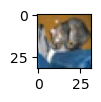

In [51]:
# 6. 모델 사용하기
plt.figure(figsize=(0.7,0.7))
plt.imshow(X_test[0])

In [53]:
pred = model.predict(X_test[0].reshape(-1,32,32,3)).argmax(axis=1)
pred

1/1 [==============================] - 0s 20ms/step


array([3], dtype=int64)

# 3. VGG
<img src='image/VGG-19.png' alt='VGG'>
<img src='image/VGG-19_Dense.png' alt='VGG_Dense'>

- 옥스퍼드 대 VGG팀에서 구현한 CNN(컨볼루션과 맥스폴링 19개층)
- VGG-19 구현

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
import cv2 # pip install opencv-python : 이미지 사이즈 조정
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Vgg19:
    @staticmethod
    def build(input_shape=(224,224,3), activation='relu'):
        model = Sequential([
            Input(shape=input_shape),
            Conv2D(64, (3,3), activation=activation, padding='same'),
            Conv2D(64, (3,3), activation=activation, padding='same'),
            MaxPooling2D(),
            Conv2D(128, (3,3), activation=activation, padding='same'),
            Conv2D(128, (3,3), activation=activation, padding='same'),
            MaxPooling2D(),
            Conv2D(256, (3,3), activation=activation, padding='same'),
            Conv2D(256, (3,3), activation=activation, padding='same'),
            Conv2D(256, (3,3), activation=activation, padding='same'),
            Conv2D(256, (3,3), activation=activation, padding='same'),
            MaxPooling2D(),
            Conv2D(512, (3,3), activation=activation, padding='same'),
            Conv2D(512, (3,3), activation=activation, padding='same'),
            Conv2D(512, (3,3), activation=activation, padding='same'),
            Conv2D(512, (3,3), activation=activation, padding='same'),
            MaxPooling2D(),
            Conv2D(512, (3,3), activation=activation, padding='same'),
            Conv2D(512, (3,3), activation=activation, padding='same'),
            Conv2D(512, (3,3), activation=activation, padding='same'),
            Conv2D(512, (3,3), activation=activation, padding='same'),
            MaxPooling2D(),
            Flatten(),
            Dense(units=4096, activation=activation),
            Dense(units=4096, activation=activation),
            Dense(units=1000, activation='softmax')
        ])
        return model

In [3]:
model = Vgg19.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [4]:
vggModel = VGG19() # 학습을 하지 않고 imageNet으로 학습이 끝난 model&weights 내려받아 가중치만 사용
weights = vggModel.get_weights()
model.set_weights(weights=weights) # 학습이 끝난 가중치를 model에 이식
# 추가적인 재학습도 가능함

In [14]:
# model.predict(읽어온이미지를 224*224*3 넘파이배열로 바꿔)
# 예측하기 위해 이미지를 읽어 -> 사이즈 조정(openCV 라이브러리 pip install opencv-python)
# 방법 1
img_cv2 = cv2.imread('data/sample.jpg',
                     cv2.IMREAD_COLOR, # BGR 포맷, 알파(투명도)채널 무시
#                      cv2.IMREAD_UNCHANGED, # 투명도까지 그대로 읽음
#                      cv2.IMREAD_GRAYSCALE, # 흑백으로 읽음
                     )
img_cv2 = cv2.resize(img_cv2, dsize = (224,224), interpolation=cv2.INTER_NEAREST)
cv2.imshow('sample', img_cv2)
cv2.waitKey(0) # 키보드입력을 기다림. 이미지가 화면에 표시된 상태를 유지
cv2.destroyAllWindows() # opencv를 통해 생성된 모든 창을 닫음
img_cv2.shape

(224, 224, 3)

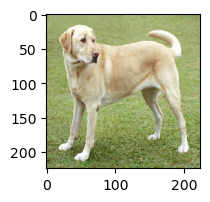

In [21]:
plt.figure(figsize=(2,2))
# BGR 포멧인 img_cv2를 RGB 포맷으로
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(img_cv2_rgb)
plt.show()

In [34]:
# 방법 2
from tensorflow.keras.preprocessing import image
img = image.load_img('data/sample.jpg', target_size=(224,224))
print(type(img))
img_data = image.img_to_array(img)
print('읽어온 img_data의 type',type(img_data),', img_data의 shape',img_data.shape)

<class 'PIL.Image.Image'>
읽어온 img_data의 type <class 'numpy.ndarray'> , img_data의 shape (224, 224, 3)


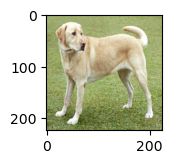

In [38]:
plt.figure(figsize=(1.5,1.5))
plt.imshow(img)
plt.show()

(numpy.ndarray, (224, 224, 3))

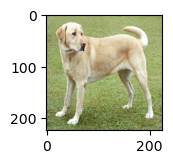

In [44]:
# 방법 3
img_data1 = plt.imread('data/sample.jpg')
img_data1 = cv2.resize(img_data1, dsize = (224,224), interpolation=cv2.INTER_NEAREST)
plt.figure(figsize=(1.5,1.5))
plt.imshow(img_data1)
type(img_data1), img_data1.shape

In [46]:
img_data.shape, img_data1.shape, img_cv2_rgb.shape

((224, 224, 3), (224, 224, 3), (224, 224, 3))

In [57]:
# 차원변경 (224,224,3) => (1, 224, 224, 3)
a = np.array([1,2,3])
# a의 shape (3,) => (1,3) : newaxis를 이용한 축추가, reshape을 이용한 shape 변경
print('a 배열의 축 추가(3행 1열) :\n',a[:, np.newaxis])
print('a 배열의 축 추가(1행 3열) :\n',a[np.newaxis, :])

a 배열의 축 추가(3행 1열) :
 [[1]
 [2]
 [3]]
a 배열의 축 추가(1행 3열) :
 [[1 2 3]]


In [59]:
# 예측하기
pred = model.predict(img_data[np.newaxis, ...])
pred.argmax()

1/1 [==============================] - 0s 24ms/step


208

In [62]:
pred = model.predict(img_data1[np.newaxis, :])
pred.argmax()

1/1 [==============================] - 0s 33ms/step


208

In [67]:
pred = model.predict(img_cv2_rgb.reshape(-1,224,224,3))
pred.argmax()

1/1 [==============================] - 0s 20ms/step


208

In [80]:
max(a)

3

In [77]:
from tensorflow.keras.applications.vgg19 import decode_predictions
result = decode_predictions(pred, top=5)[0]
for row in result:
    print('{}견종일 확률은 {}%'.format(row[1], round(row[2]*100, 2)))

Labrador_retriever견종일 확률은 75.3%
Weimaraner견종일 확률은 12.8%
kuvasz견종일 확률은 3.17%
Great_Dane견종일 확률은 1.98%
bloodhound견종일 확률은 1.52%
